In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
from PIL import Image
import torch
from torchvision import transforms

%matplotlib inline
import matplotlib.pyplot as plt

## Loading one image and get the CenterCrop

In [3]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset'

In [4]:
def preprocess_image(image_name):
  transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor()
  ])
  image = Image.open(image_name)
  image = transform(image).float()
  return image

torch.Size([3, 256, 256])


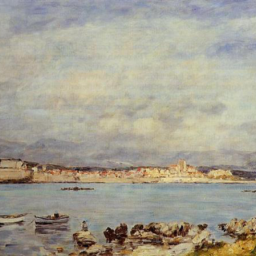

In [ ]:
filename = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Boudin/Originals/antibes-1.jpg!Large.jpg'
image = preprocess_image(filename)
print(image.shape)
display(transforms.ToPILImage()(image).convert('RGB'))

In [5]:
# Linear rescale to range [-1, 1]

def scale_minus1_1(x):
  return 2*x - 1

In [ ]:
image = scale_minus1_1(image)
print(image)

tensor([[[ 0.2235,  0.2314,  0.1922,  ...,  0.2471,  0.2549,  0.2627],
         [ 0.2314,  0.2235,  0.1922,  ...,  0.2235,  0.1922,  0.2235],
         [ 0.2392,  0.2235,  0.2078,  ...,  0.2314,  0.1922,  0.2000],
         ...,
         [-0.0588, -0.0667, -0.1216,  ..., -0.3647, -0.3725, -0.1686],
         [-0.0667, -0.0824, -0.0902,  ..., -0.2000, -0.2157, -0.3412],
         [-0.1608, -0.1529, -0.1373,  ..., -0.2000, -0.2863, -0.2157]],

        [[ 0.2549,  0.2627,  0.2235,  ...,  0.2627,  0.2706,  0.2784],
         [ 0.2627,  0.2549,  0.2235,  ...,  0.2392,  0.2078,  0.2392],
         [ 0.2706,  0.2549,  0.2392,  ...,  0.2471,  0.2078,  0.2157],
         ...,
         [-0.1608, -0.1529, -0.2078,  ..., -0.4667, -0.4824, -0.2941],
         [-0.1608, -0.1608, -0.1686,  ..., -0.3961, -0.3647, -0.4588],
         [-0.2549, -0.2314, -0.2157,  ..., -0.4510, -0.4667, -0.3255]],

        [[ 0.3490,  0.3569,  0.3176,  ...,  0.3804,  0.3804,  0.3804],
         [ 0.3569,  0.3490,  0.3176,  ...,  0

In [6]:
# Linear rescale to range [0, 1]

def scale_0_1(x):
  return (x+1)/2

In [ ]:
image = scale_0_1(image)
print(image)

tensor([[[0.6118, 0.6157, 0.5961,  ..., 0.6235, 0.6275, 0.6314],
         [0.6157, 0.6118, 0.5961,  ..., 0.6118, 0.5961, 0.6118],
         [0.6196, 0.6118, 0.6039,  ..., 0.6157, 0.5961, 0.6000],
         ...,
         [0.4706, 0.4667, 0.4392,  ..., 0.3176, 0.3137, 0.4157],
         [0.4667, 0.4588, 0.4549,  ..., 0.4000, 0.3922, 0.3294],
         [0.4196, 0.4235, 0.4314,  ..., 0.4000, 0.3569, 0.3922]],

        [[0.6275, 0.6314, 0.6118,  ..., 0.6314, 0.6353, 0.6392],
         [0.6314, 0.6275, 0.6118,  ..., 0.6196, 0.6039, 0.6196],
         [0.6353, 0.6275, 0.6196,  ..., 0.6235, 0.6039, 0.6078],
         ...,
         [0.4196, 0.4235, 0.3961,  ..., 0.2667, 0.2588, 0.3529],
         [0.4196, 0.4196, 0.4157,  ..., 0.3020, 0.3176, 0.2706],
         [0.3725, 0.3843, 0.3922,  ..., 0.2745, 0.2667, 0.3373]],

        [[0.6745, 0.6784, 0.6588,  ..., 0.6902, 0.6902, 0.6902],
         [0.6784, 0.6745, 0.6588,  ..., 0.6784, 0.6627, 0.6706],
         [0.6824, 0.6745, 0.6627,  ..., 0.6824, 0.6627, 0.

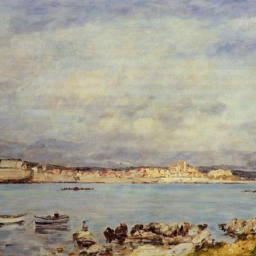

In [ ]:
display(transforms.ToPILImage()(image).convert('RGB'))

# Train set

### Pix2Pix

In [ ]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset'

#folders = sorted(os.listdir(PATH))
folders = ['Boudin', 'Caillebotte', 'Cezanne', 'Chase', 'Drawings', 'Gauguin', 'Gorbatov', 'Guillaumin', 'Hassam', 'Korovin', 'Loiseau', 'Martin', 'Maufra', 'Metcalf', 'Monet', 'Pissarro', 'Renoir', 'Robinson', 'Rose', 'Sisley', 'Thaulow', 'Twachtman', 'Van Gogh', 'Weir']
print(folders)

for folder in folders:
  print(folder)
  original_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Originals')), 3, 256, 256, dtype=torch.float)
  sketch_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Sketches')), 1, 256, 256, dtype=torch.float)
  for (i,image) in enumerate(os.listdir(PATH+'/'+folder+'/Originals')):
    print(str(i) + ': ' + image)
    original_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Originals/'+image))
    sketch_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Sketches/'+image[:-4]+' Sketch.jpg'))
  torch.save(original_dataset, PATH+'/'+folder+' Originals.pt')
  torch.save(sketch_dataset, PATH+'/'+folder+' Sketches.pt')

['Drawings']
Drawings
0: A Corner of the Asylum and the Garden with a Heavy, Sawn-Off Tree.jpg
1: A Group of Pine Trees near a House.jpg
2: Avenue of Poplars.jpg
3: A Row of Bare Trees.jpg
4: Barn with Moss-Grown Roof.jpg
5: Arums.jpg
6: A Garden with Flowers.jpg
7: Fields with Poppies.jpg
8: Garden of the Asylum.jpg
9: Field with Flowers.jpg
10: Cypresses with Two Women in the Foreground.jpg
11: Farmhouse with Wheat Field along a Road.jpg
12: Enclosed Field 2.jpg
13: Entrance Gate to a Farm with Haystacks.jpg
14: Bush in the Park at Arles The Poet s Garden II.jpg
15: Enclosed Field behind Saint-Paul Hospital.jpg
16: Enclosed Field 3.jpg
17: Cypresses.jpg
18: Drawbridge with Lady with Parasol.jpg
19: Field with Bare Tree.jpg
20: Enclosed Field.jpg
21: Cypresses 2.jpg
22: Field of Grass with a Round Clipped Shrub.jpg
23: Field with Thunderstorm.jpg
24: Enclosed Field 4.jpg
25: Country Road.jpg
26: Enclosed Field 5.jpg
27: Cottages and Trees.jpg
28: Enclosed Wheat Field with Reaper.jpg
2

torch.Size([3, 256, 256])


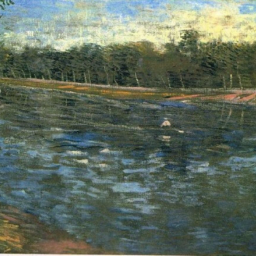

torch.Size([1, 256, 256])


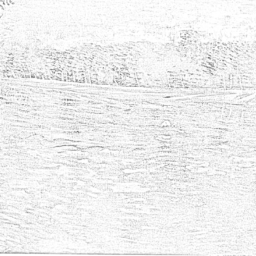

In [ ]:
elem = 0

original_dataset = torch.load(PATH+'/'+'Van Gogh Originals.pt')
print(original_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(original_dataset[elem])).convert('RGB'))

sketch_dataset = torch.load(PATH+'/'+'Van Gogh Sketches.pt')
print(sketch_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(sketch_dataset[elem])).convert('RGB'))

### StylePix2Pix

In [ ]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/DatasetStyle'

#folders = sorted(os.listdir(PATH))
folders = ['Corot', 'Shishkin']
print(folders)

for folder in folders:
  print(folder)
  original_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Originals')), 3, 256, 256, dtype=torch.float)
  sketch_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Sketches')), 1, 256, 256, dtype=torch.float)
  for (i,image) in enumerate(os.listdir(PATH+'/'+folder+'/Originals')):
    print(str(i) + ': ' + image)
    original_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Originals/'+image))
    sketch_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Sketches/'+image[:-4]+' Sketch.jpg'))
  torch.save(original_dataset, PATH+'/'+folder+' Originals.pt')
  torch.save(sketch_dataset, PATH+'/'+folder+' Sketches.pt')

['Corot', 'Shishkin']
Corot
0: the-severes-hills-le-chemin-troyon.jpg!Large.jpg
1: l-arbre-tordu-les-chenes-du-mont-usey-fontainebleau.jpg!Large.jpg
2: stream-in-the-woods.jpg!Large.jpg
3: lake-piediluco-1826.jpg!Large.jpg
4: field-above-the-village-marcoussis.jpg!Large.jpg
5: first-leaves-near-nantes.jpg!Large.jpg
6: ville-d-avray-the-large-pond-and-villas.jpg!Large.jpg
7: view-near-epernon-1860.jpg
8: mantes-cathedral.jpg!Large.jpg
9: in-the-vicinity-of-geneva.jpg!Large.jpg
10: olevano-the-town-and-the-rocks-1827.jpg!Large.jpg
11: view-of-the-roman-compagna-1826.jpg!Large.jpg
12: the-paver-of-the-chailly-1835.jpg!Large.jpg
13: figures-in-a-forest.jpg!Large.jpg
14: the-italian-goatherd.jpg!Large.jpg
15: in-the-woods-at-ville-d-avray.jpg
16: marcoussis-cows-grazing-1850.jpg!Large.jpg
17: honfleur-calvary-on-the-cote-de-grace.jpg!Large.jpg
18: ravine-in-the-morvan-near-lormes-1860.jpg
19: between-lake-geneva-and-the-alps-1825.jpg!Large.jpg
20: fontainebleau.jpg!Large.jpg
21: fishing-wit

torch.Size([3, 256, 256])


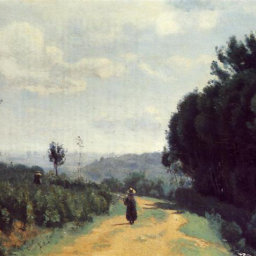

torch.Size([1, 256, 256])


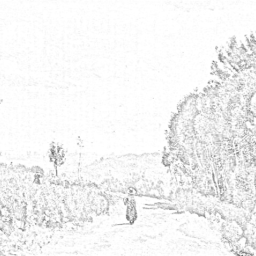

In [ ]:
elem = 0

original_dataset = torch.load(PATH+'/'+'Corot Originals.pt')
print(original_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(original_dataset[elem])).convert('RGB'))

sketch_dataset = torch.load(PATH+'/'+'Corot Sketches.pt')
print(sketch_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(sketch_dataset[elem])).convert('RGB'))

### CycleGAN

In [ ]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset'

#folders = sorted(os.listdir(PATH))
folders = ['Boudin', 'Caillebotte', 'Cezanne', 'Chase', 'Drawings', 'Gauguin', 'Gorbatov', 'Guillaumin', 'Hassam', 'Korovin', 'Loiseau', 'Martin', 'Maufra', 'Metcalf', 'Monet', 'Pissarro', 'Renoir', 'Robinson', 'Rose', 'Sisley', 'Thaulow', 'Twachtman', 'Van Gogh', 'Weir']
print(folders)

for folder in folders:
  print(folder)
  sketch3D_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Sketches3D')), 3, 256, 256, dtype=torch.float)
  for (i,image) in enumerate(os.listdir(PATH+'/'+folder+'/Originals')):
    print(str(i) + ': ' + image)
    sketch3D_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Sketches3D/'+image[:-4]+' Sketch 3D.jpg'))
  torch.save(sketch3D_dataset, PATH+'/'+folder+' Sketches 3D.pt')

['Drawings']
Drawings
0: A Corner of the Asylum and the Garden with a Heavy, Sawn-Off Tree.jpg
1: A Group of Pine Trees near a House.jpg
2: Avenue of Poplars.jpg
3: A Row of Bare Trees.jpg
4: Barn with Moss-Grown Roof.jpg
5: Arums.jpg
6: A Garden with Flowers.jpg
7: Fields with Poppies.jpg
8: Garden of the Asylum.jpg
9: Field with Flowers.jpg
10: Cypresses with Two Women in the Foreground.jpg
11: Farmhouse with Wheat Field along a Road.jpg
12: Enclosed Field 2.jpg
13: Entrance Gate to a Farm with Haystacks.jpg
14: Bush in the Park at Arles The Poet s Garden II.jpg
15: Enclosed Field behind Saint-Paul Hospital.jpg
16: Enclosed Field 3.jpg
17: Cypresses.jpg
18: Drawbridge with Lady with Parasol.jpg
19: Field with Bare Tree.jpg
20: Enclosed Field.jpg
21: Cypresses 2.jpg
22: Field of Grass with a Round Clipped Shrub.jpg
23: Field with Thunderstorm.jpg
24: Enclosed Field 4.jpg
25: Country Road.jpg
26: Enclosed Field 5.jpg
27: Cottages and Trees.jpg
28: Enclosed Wheat Field with Reaper.jpg
2

torch.Size([3, 256, 256])


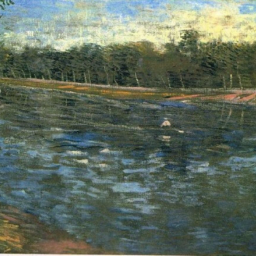

torch.Size([3, 256, 256])


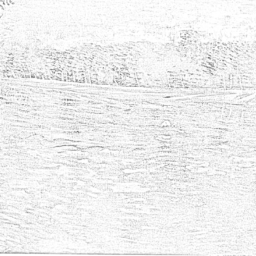

In [ ]:
elem = 0

original_dataset = torch.load(PATH+'/'+'Van Gogh Originals.pt')
print(original_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(original_dataset[elem])).convert('RGB'))

sketch3d_dataset = torch.load(PATH+'/'+'Van Gogh Sketches 3D.pt')
print(sketch3d_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(sketch3d_dataset[elem])).convert('RGB'))

#### HED

In [ ]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset'

#folders = sorted(os.listdir(PATH))
folders = ['Boudin', 'Caillebotte', 'Cezanne', 'Chase', 'Drawings', 'Gauguin', 'Gorbatov', 'Guillaumin', 'Hassam', 'Korovin', 'Loiseau', 'Martin', 'Maufra', 'Metcalf', 'Monet', 'Pissarro', 'Renoir', 'Robinson', 'Rose', 'Sisley', 'Thaulow', 'Twachtman', 'Van Gogh', 'Weir']
print(folders)

for folder in folders:
  print(folder)
  hed_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/HED')), 3, 256, 256, dtype=torch.float)
  for (i,image) in enumerate(os.listdir(PATH+'/'+folder+'/Originals')):
    print(str(i) + ': ' + image)
    hed_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/HED/'+image[:-4]+' HED.jpg'))
  torch.save(hed_dataset, PATH+'/'+folder+' HED.pt')

torch.Size([3, 256, 256])


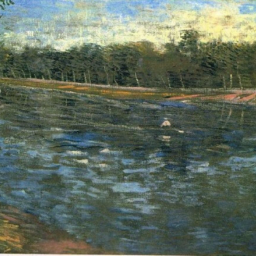

torch.Size([3, 256, 256])


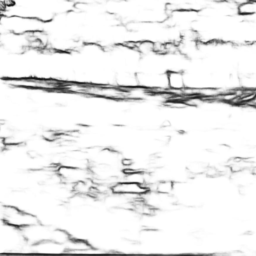

In [ ]:
elem = 0

original_dataset = torch.load(PATH+'/'+'Van Gogh Originals.pt')
print(original_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(original_dataset[elem])).convert('RGB'))

hed_dataset = -torch.load(PATH+'/'+'Van Gogh HED.pt')
print(hed_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(hed_dataset[elem])).convert('RGB'))

### Canny

In [ ]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset'

#folders = sorted(os.listdir(PATH))
folders = ['Boudin', 'Caillebotte', 'Cezanne', 'Chase', 'Drawings', 'Gauguin', 'Gorbatov', 'Guillaumin', 'Hassam', 'Korovin', 'Loiseau', 'Martin', 'Maufra', 'Metcalf', 'Monet', 'Pissarro', 'Renoir', 'Robinson', 'Rose', 'Sisley', 'Thaulow', 'Twachtman', 'Van Gogh', 'Weir']
print(folders)

for folder in folders:
  print(folder)
  canny_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Canny')), 3, 256, 256, dtype=torch.float)
  for (i,image) in enumerate(os.listdir(PATH+'/'+folder+'/Originals')):
    print(str(i) + ': ' + image)
    canny_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Canny/'+image[:-4]+' Canny.jpg'))
  torch.save(canny_dataset, PATH+'/'+folder+' Canny.pt')

['Boudin', 'Caillebotte', 'Cezanne', 'Chase', 'Drawings', 'Gauguin', 'Gorbatov', 'Guillaumin', 'Hassam', 'Korovin', 'Loiseau', 'Martin', 'Maufra', 'Metcalf', 'Monet', 'Pissarro', 'Renoir', 'Robinson', 'Rose', 'Sisley', 'Thaulow', 'Twachtman', 'Van Gogh', 'Weir']
Boudin
0: the-francois-ier-tower-at-le-havre-1852.jpg!Large.jpg
1: the-farm-in-saint-siméon-1856.jpg
2: pond-at-sunset.jpg!Large.jpg
3: trouville-shore-and-rocks.jpg!Large.jpg
4: the-seashore.jpg!Large.jpg
5: the-saint-simeon-farm-1860.jpg!Large.jpg
6: deauville-low-tide.jpg!Large.jpg
7: trouville-black-rocks.jpg!Large.jpg
8: the-beach-at-deauville-1863.jpg
9: the-entrance-1865.jpg
10: the-coastline-at-plougastel-1869.jpg!Large.jpg
11: pier-deauville-1869.jpg!Large.jpg
12: plougastel-the-ferry-passage-1870.jpg!Large.jpg
13: plougastel-the-ferry-passage-1870-1.jpg!Large.jpg
14: the-garden-1869.jpg!Large.jpg
15: seehafen-1870.jpg!Large.jpg
16: the-shore-at-plougastel-1870.jpg!Large.jpg
17: the-ferry-to-deauville.jpg!Large.jpg
18

torch.Size([3, 256, 256])


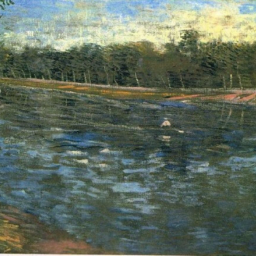

torch.Size([3, 256, 256])


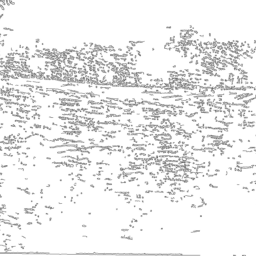

In [ ]:
elem = 0

original_dataset = torch.load(PATH+'/'+'Van Gogh Originals.pt')
print(original_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(original_dataset[elem])).convert('RGB'))

canny_dataset = -torch.load(PATH+'/'+'Van Gogh Canny.pt')
print(canny_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(canny_dataset[elem])).convert('RGB'))

# Test set

### Pix2Pix

In [7]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Test'
#folders = sorted(os.listdir(PATH))
folders = ['Constable', 'Drawings', 'Lucien Pissarro', 'Matisse', 'Photos', 'Rousseau', 'Sargent', 'Seurat', 'Van Gogh Drawings']
print(folders)

for folder in folders:
  print(folder)
  original_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Originals')), 3, 256, 256, dtype=torch.float)
  sketch_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Sketches')), 1, 256, 256, dtype=torch.float)
  for (i,image) in enumerate(os.listdir(PATH+'/'+folder+'/Originals')):
    print(str(i) + ': ' + image)
    original_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Originals/'+image))
    sketch_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Sketches/'+image[:-4]+' Sketch.jpg'))
  torch.save(sketch3D_dataset, PATH+'/'+folder+'/'+folder+' Originals.pt')
  torch.save(sketch3D_dataset, PATH+'/'+folder+'/'+folder+' Sketches.pt')

['Constable', 'Drawings', 'Lucien Pissarro', 'Matisse', 'Photos', 'Rousseau', 'Sargent', 'Seurat', 'Van Gogh Drawings']
Constable
0: flatford-mill-from-a-lock-on-the-stour-1811.jpg!Large.jpg
1: a-lane-near-dedham-1802.jpg!Large.jpg
2: golding-constable-s-flower-garden-1815.jpg!Large.jpg
3: golding-constable-s-kitchen-garden-1815.jpg!Large.jpg
4: dedham-lock-and-mill-1818.jpg!Large.jpg
5: water-meadows-near-salisbury-1820.jpg!Large.jpg
6: cottage-rainbow-mill.jpg!Large.jpg
7: dedham-church-and-vale-1800.jpg
Drawings
0: landscape_sketch_by_t1mmmm-d5vnbtu.jpg
1: 5c396eec4119324b9fd54df3c8b1ffeb.jpg
2: 15e8f5271bfa7ff2c0ae6686f5d412bb.jpg
3: interstate-80-cornfield-craig-carlson.jpg
4: view-from-richmond-hill-vincent-alexander-booth.jpg
5: pencil-drawings-of-nature-feat-1.jpg
6: f96227703bfe1892b79013dac5e17f65.jpg
7: 0e31f4170adfdfdef9cb686840d71fb4.jpg
8: dbkx83g-f4779c00-1398-46ad-995b-4c8cc7088d00.jpg
Lucien Pissarro
0: rue-de-poulfenc-riec-1910.jpg!Large.jpg
1: rye-from-cadboro-cliff-

torch.Size([3, 256, 256])


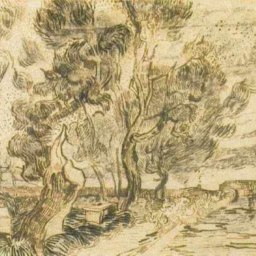

torch.Size([1, 256, 256])


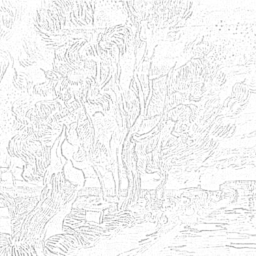

torch.Size([134, 3, 256, 256])
torch.Size([134, 1, 256, 256])


In [21]:
elem = 0
folder = 'Van Gogh Drawings'

original_dataset = torch.load(PATH+'/'+folder+'/'+folder+' Originals.pt')
print(original_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(original_dataset[elem])).convert('RGB'))

sketch_dataset = torch.load(PATH+'/'+folder+'/'+folder+' Sketches.pt')
print(sketch_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(sketch_dataset[elem])).convert('RGB'))

print(original_dataset.shape)
print(sketch_dataset.shape)

### CycleGAN

In [9]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Test'
#folders = sorted(os.listdir(PATH))
folders = ['Constable', 'Drawings', 'Lucien Pissarro', 'Matisse', 'Photos', 'Rousseau', 'Sargent', 'Seurat', 'Van Gogh Drawings']
print(folders)

for folder in folders:
  print(folder)
  sketch3D_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/Sketches3D')), 3, 256, 256, dtype=torch.float)
  for (i,image) in enumerate(os.listdir(PATH+'/'+folder+'/Originals')):
    print(str(i) + ': ' + image)
    sketch3D_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/Sketches3D/'+image[:-4]+' Sketch 3D.jpg'))
  torch.save(sketch3D_dataset, PATH+'/'+folder+'/'+folder+' Sketches 3D.pt')

['Seurat', 'Van Gogh Drawings']
Seurat
0: landscape-in-the-ile-de-france-1882.jpg!Large.jpg
1: the-hedge-also-known-as-the-clearing-1882.jpg!Large.jpg
2: village-road-1883.jpg!Large.jpg
3: a-house-between-trees-1883.jpg!Large.jpg
4: grassy-riverbank-1881.jpg!Large.jpg
Van Gogh Drawings
0: A Corner of the Asylum and the Garden with a Heavy, Sawn-Off Tree.jpg
1: A Group of Pine Trees near a House.jpg
2: Avenue of Poplars.jpg
3: A Row of Bare Trees.jpg
4: Barn with Moss-Grown Roof.jpg
5: Arums.jpg
6: A Garden with Flowers.jpg
7: Fields with Poppies.jpg
8: Garden of the Asylum.jpg
9: Field with Flowers.jpg
10: Cypresses with Two Women in the Foreground.jpg
11: Farmhouse with Wheat Field along a Road.jpg
12: Enclosed Field 2.jpg
13: Entrance Gate to a Farm with Haystacks.jpg
14: Bush in the Park at Arles The Poet s Garden II.jpg
15: Enclosed Field behind Saint-Paul Hospital.jpg
16: Enclosed Field 3.jpg
17: Cypresses.jpg
18: Drawbridge with Lady with Parasol.jpg
19: Field with Bare Tree.jpg


torch.Size([3, 256, 256])


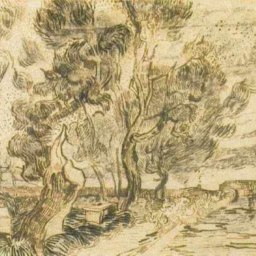

torch.Size([3, 256, 256])


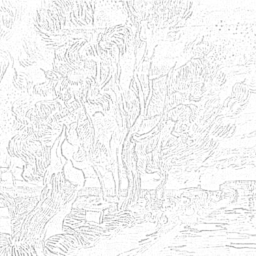

torch.Size([134, 3, 256, 256])
torch.Size([134, 3, 256, 256])


In [27]:
elem = 0
folder = 'Van Gogh Drawings'

original_dataset = torch.load(PATH+'/'+folder+'/'+folder+' Originals.pt')
print(original_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(original_dataset[elem])).convert('RGB'))

sketch_dataset = torch.load(PATH+'/'+folder+'/'+folder+' Sketches 3D.pt')
print(sketch_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(sketch_dataset[elem])).convert('RGB'))

print(original_dataset.shape)
print(sketch_dataset.shape)